In [1]:
import numpy as np

dir = 'D:/projects/datascience/bfu-ml-labs/lab_3.2_and_3.3'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as mtr
from sklearn.model_selection import train_test_split

# Подготовка данных

In [3]:
df = pd.read_csv(f"{dir}/Titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_clean = df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [7]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_clean['Sex'] = df_clean['Sex'].map({'female': 0, 'male': 1})
df_clean['Embarked'] = df_clean['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [9]:
# Процент потерянных данных.
(1. - df_clean.size / df.size) * 100
print(f"Потеряно строк: {round((1. - df_clean.shape[0] / df.shape[0]) * 100, 2)}%")
print(f"Потеряно столбцов: {round((1. - df_clean.shape[1] / df.shape[1]) * 100, 2)}%")
print(f"Потеряно данных всего (ячеек): {round((1. - df_clean.size / df.size) * 100, 2)}%")

Потеряно строк: 20.09%
Потеряно столбцов: 33.33%
Потеряно данных всего (ячеек): 46.73%


In [10]:
X = df_clean.drop(['Survived'], axis=1)
y = df_clean['Survived']
X.shape, y.shape

((712, 7), (712,))

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1


In [12]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(max_iter=200, random_state=123)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=123)

In [16]:
y_pred = model.predict(X_test)
print(mtr.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        83
           1       0.79      0.63      0.70        60

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.76       143
weighted avg       0.78      0.78      0.77       143



In [17]:
conf_mat = mtr.confusion_matrix(y_test, y_pred)
conf_mat

array([[73, 10],
       [22, 38]], dtype=int64)

Text(10.222222222222223, 0.5, 'Actual')

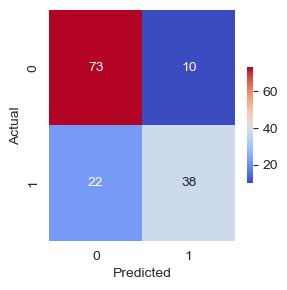

In [18]:
plt.figure(figsize=(3, 3))
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.5})
plt.xlabel('Predicted')  # cols = predicted
plt.ylabel('Actual')  # rows = actual

In [19]:
survived_proba = model.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'PR Curve')

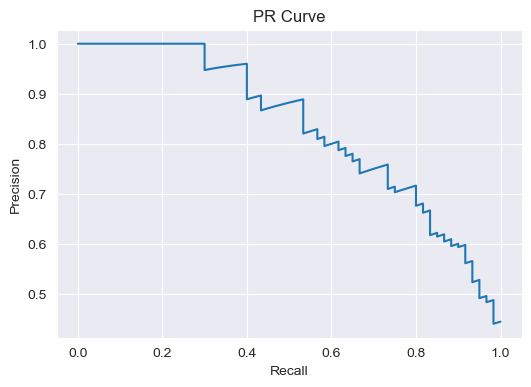

In [20]:
precision, recall, _ = mtr.precision_recall_curve(y_test, survived_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')

Text(0.5, 1.0, 'ROC Curve')

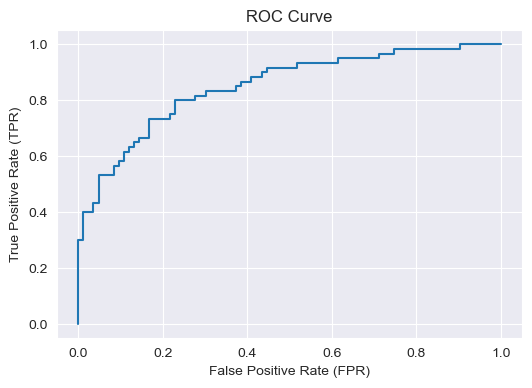

In [21]:
fpr, tpr, _ = mtr.roc_curve(y_test, survived_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

In [22]:
f_imp_ndarr = abs(model.coef_[0]) / sum(abs(model.coef_[0]))
f_imp_df = pd.DataFrame(f_imp_ndarr, index=X.columns, columns=['Importance'])
f_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

<AxesSubplot:>

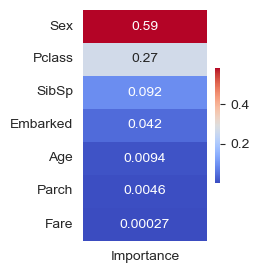

In [23]:
plt.figure(figsize=(2, 3))
sns.heatmap(f_imp_df, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.5})

In [24]:
f_imp_df

,Importance
Sex,0.585353
Pclass,0.266929
SibSp,0.091549
Embarked,0.041920
Age,0.009429
Parch,0.004552
Fare,0.000269


In [25]:
# Попробуем обучить ещё одну модель, но теперь без признака Embarked,
# чтобы убедиться в его почти полной бесполезности.
X_train_reduced = X_train.drop(['Embarked'], axis=1)
X_test_reduced = X_test.drop(['Embarked'], axis=1)
model_reduced = LogisticRegression(max_iter=200, random_state=123)
model_reduced.fit(X_train_reduced, y_train)
y_pred = model_reduced.predict(X_test_reduced)
print(mtr.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        83
           1       0.79      0.63      0.70        60

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.76       143
weighted avg       0.78      0.78      0.77       143



### Вывод по логистической регрессии

Точность модели — около 78%. Признак `Embarked` влияет примерно "на 4.2%" (по отношению к общему влиянию признаков). Он занимает 4-ое место среди всех признаков, однако всё ещё вносит довольно малый вклад в качество модели. Основная предсказательная способность определяется признаками `Sex` и `Pclass`. Удаление столбца `Embarked` почти не изменяет точность модели.

Модель лучше справляется с угадыванием умерших на Титанике людей, чем выживших. Скорее всего, дело в несбалансированности классов (погибших гораздо больше).

# Метод опорных векторов

In [26]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model = SVC(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77        83
           1       0.76      0.32      0.45        60

    accuracy                           0.67       143
   macro avg       0.71      0.62      0.61       143
weighted avg       0.70      0.67      0.63       143



# Метод k ближайших соседей

In [27]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        83
           1       0.61      0.55      0.58        60

    accuracy                           0.66       143
   macro avg       0.65      0.65      0.65       143
weighted avg       0.66      0.66      0.66       143



D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Промежуточные итоги

При стандартных настройках (без поиска оптимальных гиперпараметров) логистическая регрессия дала гораздо лучший результат, чем SVM и k-nn (разница в точности — более 10%).

Посмотрим, что будет, если отыскать лучшие комбинации гиперпараметров для каждой из моделей. Для этого воспользуемся `GridSearchCV` и `5-fold` кросс-валидацией. Кроме того, попробуем нормализовать данные, т.к. некоторые из моделей к этому чувствительны (особенно SVM и k-nn).

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled

array([[ 0.93524311,  0.75906343,  0.15385938, ..., -0.51300856,
        -0.52598573,  0.29936739],
       [-1.4404414 ,  0.75906343,  0.42829821, ..., -0.51300856,
        -0.17059949,  0.29936739],
       [-0.25259914,  0.75906343, -0.32640857, ...,  1.83158476,
         0.12070973, -1.88447935],
       ...,
       [ 0.93524311,  0.75906343, -1.42416389, ...,  1.83158476,
         0.222739  ,  0.29936739],
       [-1.4404414 ,  0.75906343,  2.41797972, ..., -0.51300856,
        -0.16748346,  0.29936739],
       [ 0.93524311,  0.75906343, -0.73806681, ..., -0.51300856,
        -0.52518803,  0.29936739]])

In [60]:
X_test_scaled

array([[ 0.93524311,  0.75906343, -0.25779886, ..., -0.51300856,
         0.40674375,  0.29936739],
       [ 0.93524311,  0.75906343, -0.66945711, ..., -0.51300856,
        -0.52598573,  0.29936739],
       [-1.4404414 , -1.31741297,  0.01663996, ..., -0.51300856,
         1.36416368, -1.88447935],
       ...,
       [ 0.93524311,  0.75906343, -0.39501828, ..., -0.51300856,
        -0.54140671,  0.29936739],
       [ 0.93524311,  0.75906343, -0.12057945, ..., -0.51300856,
        -0.5246281 ,  0.29936739],
       [-1.4404414 ,  0.75906343,  0.70273704, ..., -0.51300856,
        -0.08215226, -1.88447935]])

### Логистическая регрессия

In [64]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1., 10., 100., 1000.],
}

model = LogisticRegression(random_state=123, max_iter=200)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

print(f"Оптимальные гиперпараметры:\n{grid_search.best_params_}")
print()
print(f"Лучший результат:\n{grid_search.best_score_}")

Оптимальные гиперпараметры:
{'C': 10.0}

Лучший результат:
0.8067225586089117


### Метод опорных векторов

In [65]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1., 10., 100., 1000.],
    'gamma': [0.01, 0.1, 1., 'scale', 'auto'],
}

model = SVC(random_state=123)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

print(f"Оптимальные гиперпараметры:\n{grid_search.best_params_}")
print()
print(f"Лучший результат:\n{grid_search.best_score_}")

Оптимальные гиперпараметры:
{'C': 1000.0, 'gamma': 0.01}

Лучший результат:
0.8207731718677224


### Метод k ближайших соседей

In [66]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 25, 50],
    'weights': ['uniform', 'distance'],
}

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

print(f"Оптимальные гиперпараметры:\n{grid_search.best_params_}")
print()
print(f"Лучший результат:\n{grid_search.best_score_}")

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

Оптимальные гиперпараметры:
{'n_neighbors': 10, 'weights': 'uniform'}

Лучший результат:
0.815494488433473


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

# Окончательные итоги

При оптимальном подборе гиперпараметров для каждой из моделей и после масштабирования входных данных, применение `5-fold` валидации дало следующие результаты.

1. На первом месте модель SVM со средней точностью 82%.

2. На втором -- метод k-nn (81.5%).

3. На третьем -- логистическая регрессия (80.5%).

Это говорит о важности предварительной подготовки данных, оптимального подбора гиперпараметров и правильном подходе к оценке (тестированию). В целом, в случае датасета Титаника, все 3 рассмотренные модели дали приблизительно одинаковую точность, и весьма высокую.